# Usuários github das stars no BibMon (atualizado)

* 1 nabelly19
* 2 trevisharp
* 3 emileeem
* 4 Rafael-Rafael
* 5 josielqrozjr
* 6 mateusalvesramos
* 7 Eric-Coutinho
* 8 Dudu01001
* 9 marcoshrb
* 10 aldse
* 11 Janeckiisa
* 12 JorgeSTJordao
* 13 landergerotto
* 14 SocekMurilo
* 15 donathanramalho
* 16 Queyonce

## Integração entre os projetos Bibmon e 3W

O desafio proposto no Hackathon Petrobras envolve a integração de dois projetos, BibMon e 3W Dataset, com o objetivo de aplicar inteligência artificial para identificar eventos indesejados em poços de petróleo. Ao combinar a biblioteca BibMon com o conjunto de dados 3W, é possível detectar falhas e anomalias nos processos de extração.

### 3W Dataset
    Dados históricos de produção selecionados, rotulados e publicados para a comunidade científica desenvolver soluções em um ambiente de inovação aberta.
https://github.com/petrobras/3w

###  BibMon
    Pacote Python que fornece modelos preditivos para detecção e diagnóstico de falhas, sensoriamento virtual e monitoramento da condição de processos.
https://github.com/petrobras/bibmon

# 1 Processamento De Dados (estratégia inicial de manipulação de dados)

Realizamos uma limpeza minuciosa dos dados para tratar valores ausentes, garantindo que as informações utilizadas nos modelos de Inteligência Artificial fossem de alta qualidade. Essa etapa foi crucial para minimizar a introdução de viés e melhorar a acurácia das previsões.

Antes da análise exploratória, realizamos um processamento detalhado dos dados, que incluiu a seguinte etapa:

* Tratamento de Dados Ausentes: Além de substituir valores ausentes por zero, aplicamos métodos de imputação, como a média ou a mediana, dependendo da distribuição das variáveis. Isso garantiu que os dados fossem completos e prontos para a análise.

Essa etapa de pré-processamento foi fundamental para preparar o dataset, permitindo uma análise exploratória mais precisa e uma modelagem de maior qualidade. Os dados atualizados foram devidamente salvos para que pudessem ocorrer futuras análises independentes.


In [1]:
import os
import pandas as pd

In [ ]:
dataset_path = 'dataset/'
output_path = 'dataset_modificado/'

Nessa etapa a equipe decidiu substituir todos os Estados que eram NaN para 0, pois se já não tinhamos o valor era mais simples de tratar 0 do que NaN e assim foi feito.

In [ ]:
def processar_parquet(file_path, output_file_path, coluna):
    """
    Processes a Parquet file by filling missing values in a specified column, 
    then saves the result to a new Parquet file.

    Parameters:
    ----------
    file_path : str
        Path to the input Parquet file.
    
    output_file_path : str
        Path to save the processed Parquet file.
    
    coluna : str
        Column to process. If it exists, missing values (NaN) will be replaced with 0.

    Notes:
    ------
    - Prints a message if the column is not found.
    - Saves the modified DataFrame without row indices.
    
    Example:
    --------
    processar_parquet('input.parquet', 'output.parquet', 'sales')
    """
    parquet_file = pd.read_parquet(file_path)
    
    if coluna in parquet_file.columns:
        parquet_file[coluna].fillna(0, inplace=True)
    else:
        print(f"Coluna {coluna} não encontrada em {file_path}")

    parquet_file.to_parquet(output_file_path, index=False)

In [ ]:
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [ ]:
coluna = 'ESTADO-XO' #todos os estados

O laço de repetição "for" irá percorrer todo o dataset modificando os NaN do Estado escolhido acima para 0.

In [ ]:
for folder in range(10):
    folder_path = os.path.join(dataset_path, str(folder))
    output_folder_path = os.path.join(output_path, str(folder))
    
    # Criar a pasta de saída correspondente se não existir
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
    
    # Iterar sobre os arquivos Parquet na pasta
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".parquet"):
            file_path = os.path.join(folder_path, file_name)
            output_file_path = os.path.join(output_folder_path, file_name)
            
            print(f"Processando {file_path} e sobrescrevendo {output_file_path}")
            processar_parquet(file_path, output_file_path, coluna)

print("Processamento concluído!")

Para o restante de operações foi escolhido pegar uma média de valores e substituir os NaN por essa média.

In [ ]:
def fillna_with_mean(folder, column_name):
    """
    Fills missing values in a specified column with the mean of that column 
    for all Parquet files in a folder, then saves the modified files to a new folder.

    Parameters:
    ----------
    folder : str
        Folder name where the Parquet files are located.
    
    column_name : str
        Name of the column where missing values will be replaced with the mean.

    Notes:
    ------
    - Creates a new folder to store the modified files.
    - Only processes files with a ".parquet" extension.
    - Prints the processing status and the path to the saved file.
    
    Example:
    --------
    fillna_with_mean('data', 'sales')
    """
    folder_path = os.path.join(dataset_path, str(folder))
    modified_folder_path = os.path.join(output_path, str(folder))
    
    os.makedirs(modified_folder_path, exist_ok=True)

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".parquet"):
            file_path = os.path.join(folder_path, file_name)
            modified_file_path = os.path.join(modified_folder_path, file_name)
            print(f"Processando {file_path}")

            df = pd.read_parquet(file_path)

            mean_value = df[column_name].mean()

            df[column_name].fillna(mean_value, inplace=True)

            df.to_parquet(modified_file_path, index=False)
            print(f"Arquivo salvo em: {modified_file_path}")

In [ ]:
for folder in range(10):
    fillna_with_mean(folder, 'T-TPT') 

# 2 Análise Exploratória

### 2.1 Objetivo Geral

O objetivo deste projeto é utilizar técnicas de Inteligência Artificial da Bibmon para detectar diferentes eventos indesejados presentes no 3W Dataset. Para alcançar uma análise com alta acurácia, realizamos uma exploração abrangente dos dados, visando aprimorar a confiabilidade do dataset.

Os passos seguidos durante o processo de Análise Exploratória de Dados (EDA) foram:

Análise Gráfica: Implementamos diversas visualizações gráficas para compreender melhor a distribuição e as relações entre as variáveis do dataset. Esses gráficos nos ajudaram a identificar padrões, tendências e possíveis anomalias nos dados.

Análise de Correlação: Realizamos uma análise de correlação para identificar relações entre variáveis. Usamos matrizes de correlação e gráficos de dispersão para visualizar e quantificar essas relações, o que nos ajudou a selecionar as variáveis mais relevantes para a modelagem.

Por meio dessas abordagens, buscamos assegurar que o dataset fosse robusto e adequado para a aplicação de técnicas avançadas de Machine Learning.

### 2.2 Nova abordagem

In [ ]:
! pip install dask[complete] fastparquet


In [ ]:
#Importações necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import dask.dataframe as dd

Durante a análise da documentação do 3W, foi observado que cada arquivo Parquet continha um conjunto específico de colunas, sendo que cada coluna tinha um significado bem definido. Além disso, as pastas numeradas de 0 a 9 representavam diferentes estados ou condições, que influenciavam a interpretação dos dados contidos em cada arquivo.

Com base nessa estrutura, foram desenvolvidas soluções para centralizar todos os dados, com três colunas adicionais: o ID (correspondente ao número da pasta), a data e a hora do registro. Foram criadas funções específicas para carregar e manipular os dados (REMOÇÃO DE DADOS SIMULADOS, ANÁLISE DOS ARQUIVOS PARA A GERAÇÃO DAS NOVAS COLUNAS), classificá-los de acordo com critérios pré-definidos (DISTRIBUIÇÃO DA CLASSIFICAÇÃO DAS OPERAÇÕES) e gerar gráficos que visualizam a distribuição de determinadas operações. Essas visualizações permitem uma análise mais intuitiva e eficiente dos dados, destacando tendências relevantes.

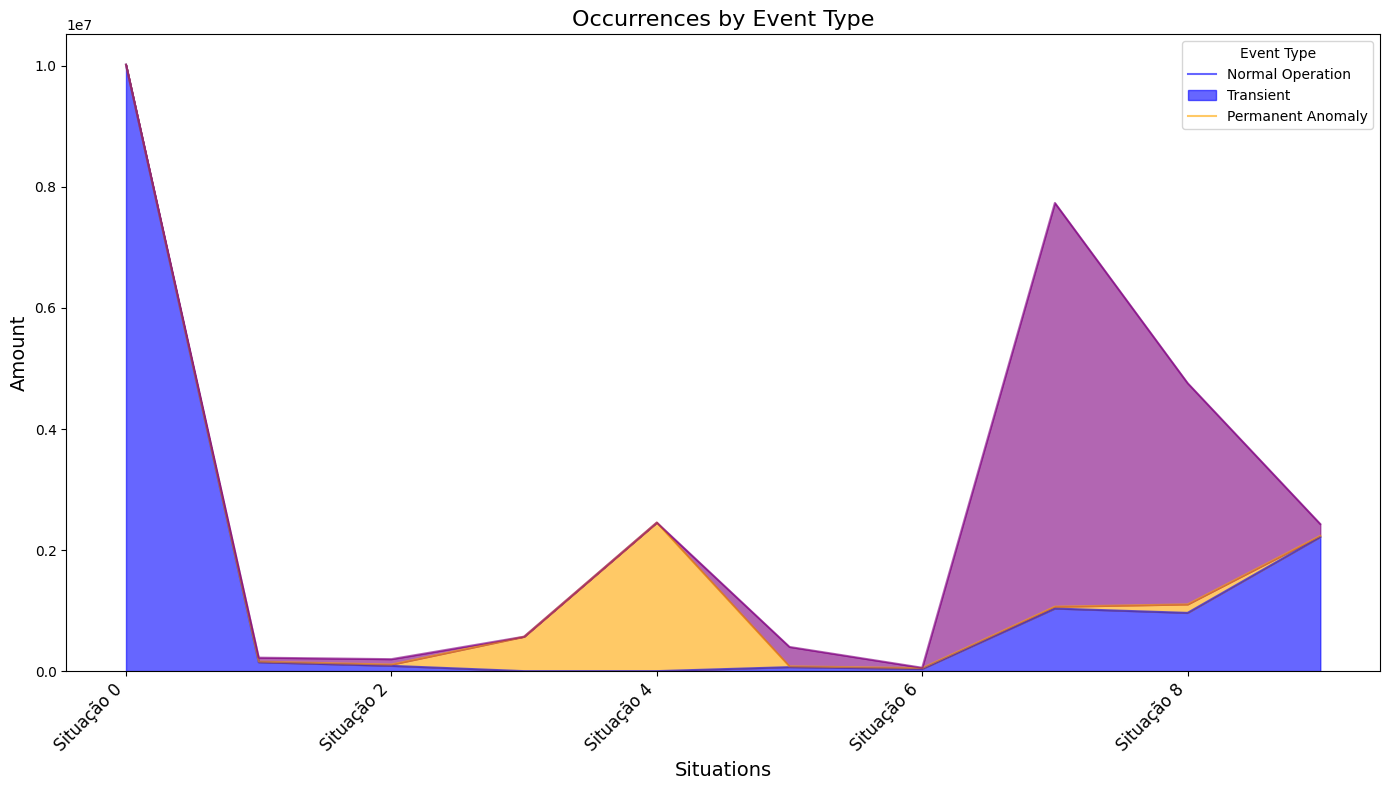

Event Types:
0 = Normal Operation
1 = Abrupt Increase of BSW
2 = Spurious Closure of DHSV
3 = Severe Slugging
4 = Flow Instability
5 = Rapid Productivity Loss
6 = Quick Restriction in PCK
7 = Scaling in PCK
8 = Hydrate in Production Line
9 = Hydrate in Service Line


In [7]:
# Mapeamento das pastas para situações específicas
folder_mapping = {
    0: 'Situação 0',
    1: 'Situação 1',
    2: 'Situação 2',
    3: 'Situação 3',
    4: 'Situação 4',
    5: 'Situação 5',
    6: 'Situação 6',
    7: 'Situação 7',
    8: 'Situação 8',
    9: 'Situação 9'
}

# Labels originais das pastas disponibilizadas no 3W
# 0 = Normal Operation
# 1 = Abrupt Increase of BSW
# 2 = Spurious Closure of DHSV
# 3 = Severe Slugging
# 4 = Flow Instability
# 5 = Rapid Productivity Loss
# 6 = Quick Restriction in PCK
# 7 = Scaling in PCK
# 8 = Hydrate in Production Line
# 9 = Hydrate in Service Line

# Função para carregar e combinar dados
def load_and_combine_data(dataset_dir):
    """
    Loads and combines Parquet files from multiple folders, adding additional columns 
    for folder ID, date, and time extracted from the file names.

    Parameters:
    ----------
    dataset_dir : str
        Path to the root directory containing subfolders (0 to 9) with Parquet files.

    Returns:
    --------
    dask.DataFrame or None
        A combined Dask DataFrame with all the data from the Parquet files, or None 
        if no files were found.
    
    Functionality:
    --------------
    - Iterates through folders (0-9) and loads all valid Parquet files (ignoring those 
      starting with 'SIMULATED').
    - Extracts date and time from the filename and adds them as new columns ('data', 'hora').
    - Adds a 'folder_id' column to identify the folder each file originated from.
    
    Example:
    --------
    df = load_and_combine_data('/path/to/dataset')
    """
    dfs = []
    for folder in range(10):
        folder_path = os.path.join(dataset_dir, str(folder))
        if os.path.exists(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.parquet') and not file_name.startswith('SIMULATED'):
                    file_path = os.path.join(folder_path, file_name)
                    
                    # Carrega o DataFrame
                    df = dd.read_parquet(file_path)
                    
                    # Adiciona a coluna 'folder_id' com o número da pasta
                    df = df.assign(folder_id=folder)

                    # Extrai data e hora do nome do arquivo (padrão: WELL-00008_20170818000222)
                    date_str = file_name.split('_')[1]  # Obtém a parte da data (formato yyyyMMddhhmmss)
                    date = date_str[:8]  # yyyyMMdd
                    time = date_str[8:]  # hhmmss
                    
                    # Formata a data para o formato yyyy-mm-dd
                    formatted_date = f"{date[:4]}-{date[4:6]}-{date[6:]}"
                    
                    # Formata o tempo para o formato hh:mm:ss
                    formatted_time = f"{time[:2]}:{time[2:4]}:{time[4:]}"
                    
                    # Adiciona as colunas de 'data' e 'hora'
                    df = df.assign(data=formatted_date, hora=formatted_time)

                    # Adiciona o DataFrame à lista
                    dfs.append(df)

    # Concatena todos os DataFrames Dask em um único
    if dfs:
        return dd.concat(dfs)
    else:
        return None

# Função para classificar eventos
def classify_events(df):
    """
    Classifies events in the dataset by folder and event type, and summarizes the 
    occurrences of different event types.

    Parameters:
    ----------
    df : dask.DataFrame
        The DataFrame containing the event data, including a 'folder_id' column and a 'class' column.

    Returns:
    --------
    dict
        A dictionary summarizing the count of events by event type ('Normal Operation', 
        'Transient', 'Permanent Anomaly') for each folder.
    
    Functionality:
    --------------
    - For each folder (0-9), counts the occurrences of events in three categories:
      - 'Normal Operation': Events classified as 0.
      - 'Transient': Events classified between 1 and 9.
      - 'Permanent Anomaly': Events classified between 101 and 109.
    
    Example:
    --------
    event_summary = classify_events(df)
    """
    # Inicializar um dicionário para armazenar contagens por pasta
    data = {folder_mapping[i]: {
        'Normal Operation': 0,
        'Transient': 0,
        'Permanent Anomaly': 0
    } for i in range(10)}

    # Contar os eventos por categoria para cada pasta
    for folder in range(10):
        # Filtrar os dados pela pasta atual
        folder_data = df[df['folder_id'] == folder]

        # Verifica se o DataFrame não está vazio usando a contagem de linhas
        if len(folder_data.index) > 0:  # Verifica se há linhas
            dtb = folder_data['class'].value_counts().compute()
            
            # Preencher os dados para cada situação
            data[folder_mapping[folder]]['Normal Operation'] = dtb.get(0, 0)
            data[folder_mapping[folder]]['Transient'] = dtb[(dtb.index >= 1) & (dtb.index <= 9)].sum()
            data[folder_mapping[folder]]['Permanent Anomaly'] = dtb[(dtb.index >= 101) & (dtb.index <= 109)].sum()

    return data

# Função para visualizar os dados
def visualize_data(data):
    """
    Visualizes the event distribution by type using a stacked area chart.

    Parameters:
    ----------
    data : dict
        A dictionary where keys are folder names, and values are dictionaries with 
        counts of different event types ('Normal Operation', 'Transient', 'Permanent Anomaly').

    Returns:
    --------
    None
        Displays a stacked area chart showing the distribution of event types for each folder.
    
    Functionality:
    --------------
    - Converts the input dictionary into a DataFrame for plotting.
    - Generates a stacked area chart with event types represented in different colors.
    - Adds labels for the x and y axes, and a title.
    
    Example:
    --------
    visualize_data(event_summary)
    """
    
    # Converte o dicionário para um DataFrame e transpõe as linhas e colunas
    df_plot = pd.DataFrame(data).T  
    
    # Plota um gráfico de área empilhado
    df_plot.plot(kind='area', stacked=True, color=['blue', 'orange', 'purple'], figsize=(14, 8), alpha=0.6)

    # Configurações do gráfico
    plt.title('Occurrences by Event Type', fontsize=16)
    plt.xlabel('Situations', fontsize=14)
    plt.ylabel('Amount', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=10)
    plt.legend(title='Event Type', labels=['Normal Operation', 'Transient', 'Permanent Anomaly'], loc='upper right')

    plt.tight_layout()  # Ajusta o layout para que os elementos não fiquem sobrepostos
    plt.show()

    print("Event Types:")
    print("0 = Normal Operation")
    print("1 = Abrupt Increase of BSW")
    print("2 = Spurious Closure of DHSV")
    print("3 = Severe Slugging")
    print("4 = Flow Instability")
    print("5 = Rapid Productivity Loss")
    print("6 = Quick Restriction in PCK")
    print("7 = Scaling in PCK")
    print("8 = Hydrate in Production Line")
    print("9 = Hydrate in Service Line")

# Caminho para o diretório do dataset
dataset_dir = "C:/Users/anabe/OneDrive/Área de Trabalho/HACKATHON PETROBRÁS/dataset_modificado/dataset_modificado"

# Carregar os dados
final_df = load_and_combine_data(dataset_dir)

# Verificar se os dados foram carregados
if final_df is not None:
    # Classificar os eventos
    event_data = classify_events(final_df)

    # Visualizar os dados
    visualize_data(event_data)
else:
    print("Nenhum dado foi carregado.")


In [8]:
# Filtrar os dados para as pastas 0
pastas_selecionadas = final_df[final_df['folder_id'].isin([0])]

In [10]:
print(pastas_selecionadas.head())

   ABER-CKGL  ABER-CKP  ESTADO-DHSV  ESTADO-M1  ESTADO-M2  ESTADO-PXO  \
0        NaN       NaN          1.0        1.0        0.0         0.0   
1        NaN       NaN          1.0        1.0        0.0         0.0   
2        NaN       NaN          1.0        1.0        0.0         0.0   
3        NaN       NaN          1.0        1.0        0.0         0.0   
4        NaN       NaN          1.0        1.0        0.0         0.0   

   ESTADO-SDV-GL  ESTADO-SDV-P  ESTADO-W1  ESTADO-W2  ...  QGL  T-JUS-CKP  \
0            0.0           1.0        1.0        0.0  ...  0.0   84.64463   
1            0.0           1.0        1.0        0.0  ...  0.0   84.63828   
2            0.0           1.0        1.0        0.0  ...  0.0   84.63194   
3            0.0           1.0        1.0        0.0  ...  0.0   84.62558   
4            0.0           1.0        1.0        0.0  ...  0.0   84.61923   

   T-MON-CKP  T-PDG     T-TPT  class  state  folder_id        data  \
0        NaN    0.0  119.078

In [11]:
# Remover o sufixo '.parquet' da coluna 'hora'
pastas_selecionadas['hora'] = pastas_selecionadas['hora'].str.replace('.parquet', '', regex=False)

# Verificar se a remoção foi bem-sucedida
print(pastas_selecionadas['hora'].head())


0    01:02:07
1    01:02:07
2    01:02:07
3    01:02:07
4    01:02:07
Name: hora, dtype: string


Observação: Foram analisadas detalhadamente as colunas que apresentaram gráficos relevantes e significativos para as predições. Apenas as colunas que demonstraram variações consistentes e impactantes, capazes de contribuir para uma análise robusta e confiável, foram mantidas para o desenvolvimento do modelo preditivo.

### 2.3 Abordagem utilizada anteriormente

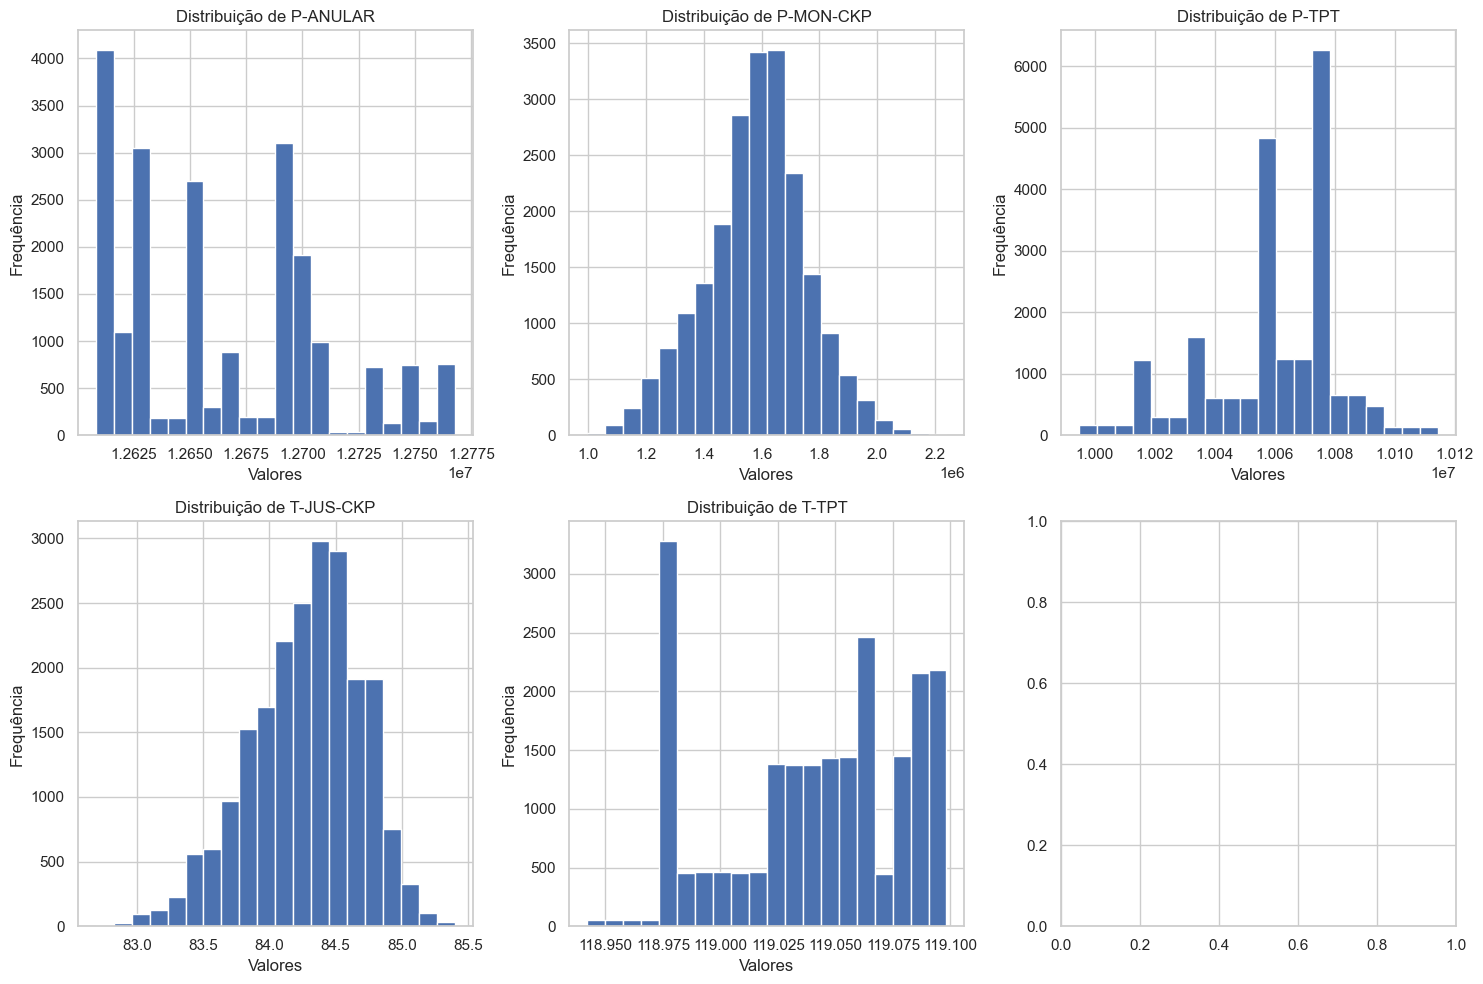

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 linhas, 3 colunas

#P-ANULAR = Pressure in the well annulus [Pa]
#P-MON-CKP = Upstream pressure of the PCK (production choke) [Pa]
#P-TPT = Pressure at the TPT (temperature and pressure transducer) [Pa]
#T-JUS-CKP = Downstream temperature of the PCK (production choke) [oC]
#T-TPT = Temperature at the TPT (temperature and pressure transducer) [oC]

# Plotando cada histograma em seu respectivo subplot
columns = ['P-ANULAR', 'P-MON-CKP', 'P-TPT', 'T-JUS-CKP', 'T-TPT']

for i, column in enumerate(columns):
    row = i // 3  # Definir linha
    col = i % 3   # Definir coluna
    axes[row, col].hist(df[column], bins=20)
    axes[row, col].set_title(f'Distribuição de {column}')
    axes[row, col].set_xlabel('Valores')
    axes[row, col].set_ylabel('Frequência')

# Ajustando o layout
plt.tight_layout()
plt.show()

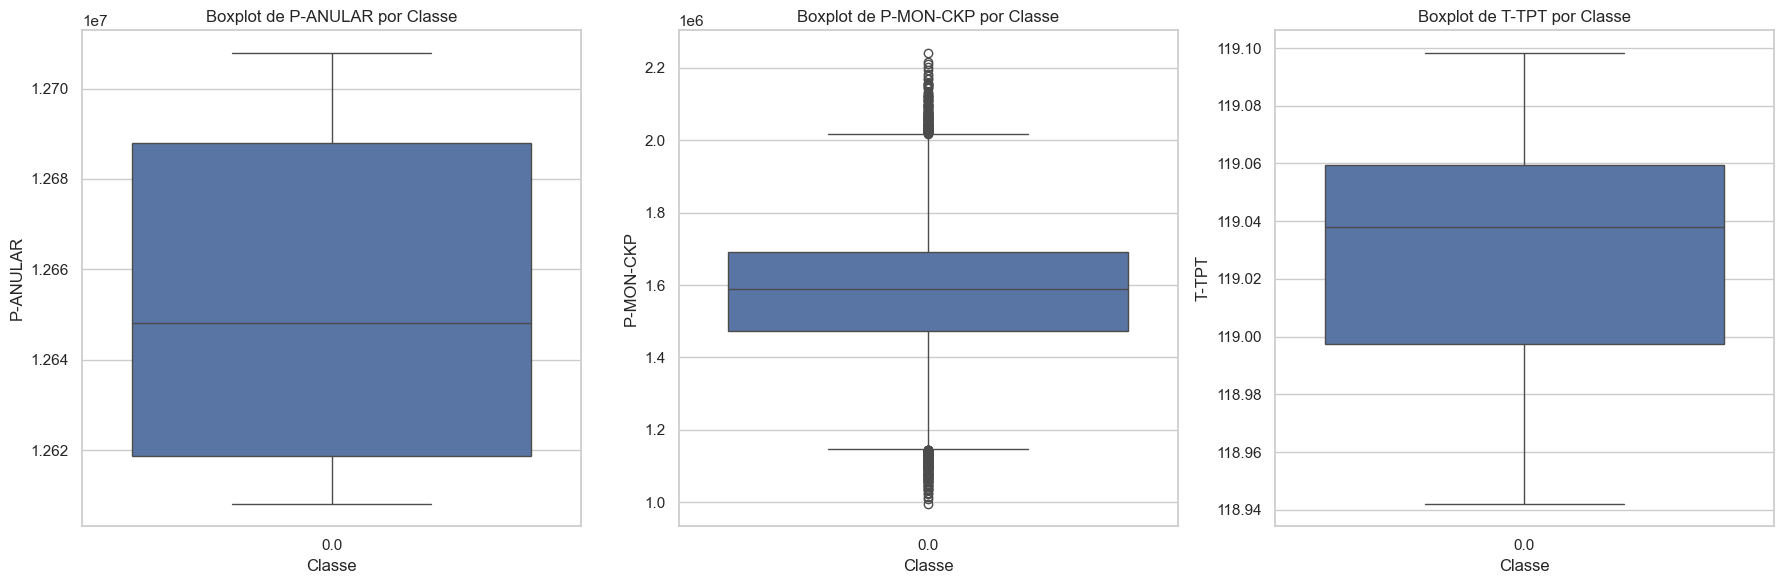

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha e 3 colunas

sns.boxplot(x='class', y='P-ANULAR', data=df, ax=axes[0])
axes[0].set_title('Boxplot de P-ANULAR por Classe')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('P-ANULAR')

sns.boxplot(x='class', y='P-MON-CKP', data=df, ax=axes[1])
axes[1].set_title('Boxplot de P-MON-CKP por Classe')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('P-MON-CKP')

sns.boxplot(x='class', y='T-TPT', data=df, ax=axes[2])
axes[2].set_title('Boxplot de T-TPT por Classe')
axes[2].set_xlabel('Classe')
axes[2].set_ylabel('T-TPT')

plt.tight_layout()

plt.show()

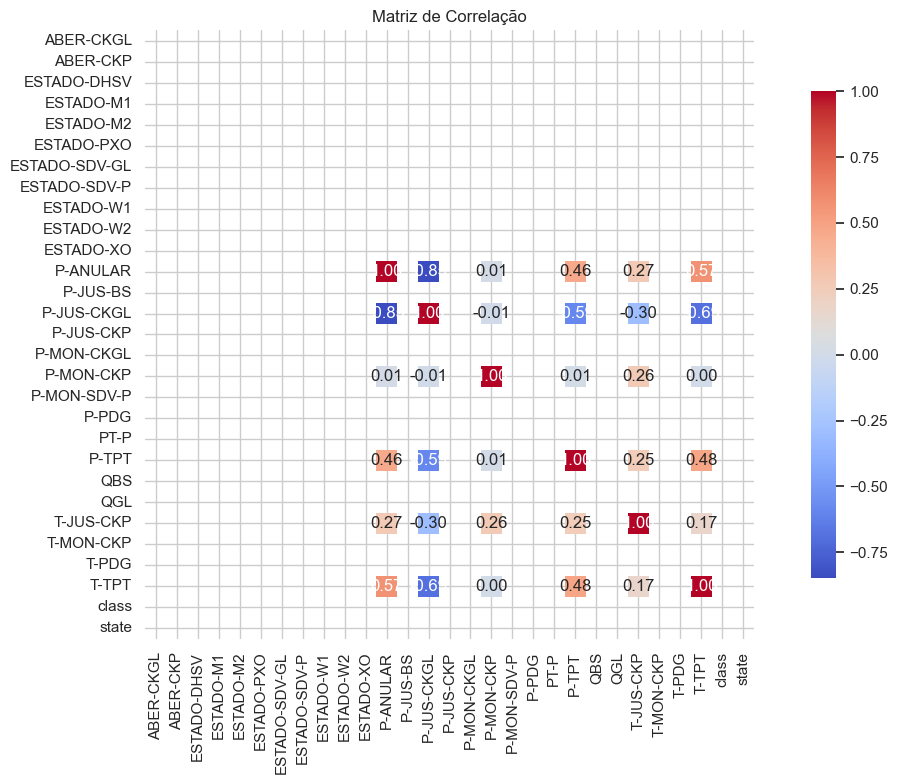

In [7]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Criar um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Adicionando título
plt.title('Matriz de Correlação')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [10]:
#Análise Univariada Sem Gráficos
#A análise univariada envolve estudar cada variável 
# individualmente, usando estatísticas descritivas para 
# entender suas características principais (distribuição, média, desvio padrão, etc.).

# Estatísticas descritivas
for column in columns:
    print(f'\nAnálise Univariada para a Coluna: {column}')
    print(df[column].describe())  # Exibe estatísticas descritivas básicas
    print(f'Média: {df[column].mean()}')  # Média
    print(f'Mediana: {df[column].median()}')  # Mediana
    print(f'Desvio Padrão: {df[column].std()}')  # Desvio padrão
    print(f'Valores Nulos: {df[column].isna().sum()}')  # Valores ausentes


Análise Univariada para a Coluna: P-ANULAR
count    2.147400e+04
mean     1.266314e+07
std      4.543994e+04
min      1.260813e+07
25%      1.262532e+07
50%      1.264803e+07
75%      1.269633e+07
max      1.276773e+07
Name: P-ANULAR, dtype: float64
Média: 12663141.961907422
Mediana: 12648030.0
Desvio Padrão: 45439.941564027016
Valores Nulos: 0

Análise Univariada para a Coluna: P-MON-CKP
count    2.147400e+04
mean     1.580504e+06
std      1.763775e+05
min      9.960668e+05
25%      1.475401e+06
50%      1.590978e+06
75%      1.689751e+06
max      2.240969e+06
Name: P-MON-CKP, dtype: float64
Média: 1580504.0524727576
Mediana: 1590978.0
Desvio Padrão: 176377.5243050334
Valores Nulos: 0

Análise Univariada para a Coluna: P-TPT
count    2.147400e+04
mean     1.005907e+07
std      2.165844e+04
min      9.994737e+06
25%      1.005108e+07
50%      1.006144e+07
75%      1.007454e+07
max      1.011443e+07
Name: P-TPT, dtype: float64
Média: 10059071.437645525
Mediana: 10061445.0
Desvio Padrão

In [11]:
#Análise Multivariada Sem Gráficos

# Matriz de Correlação
correlation_matrix = df[columns].corr()

print("Matriz de Correlação entre as Colunas:")
print(correlation_matrix)

Matriz de Correlação entre as Colunas:
           P-ANULAR  P-MON-CKP     P-TPT  T-JUS-CKP     T-TPT
P-ANULAR   1.000000   0.012151  0.461985   0.265624  0.573004
P-MON-CKP  0.012151   1.000000  0.009976   0.259207  0.000420
P-TPT      0.461985   0.009976  1.000000   0.249735  0.484719
T-JUS-CKP  0.265624   0.259207  0.249735   1.000000  0.167426
T-TPT      0.573004   0.000420  0.484719   0.167426  1.000000


In [12]:
# Matriz de Covariância
covariance_matrix = df[columns].cov()

print("Matriz de Covariância entre as Colunas:")
print(covariance_matrix)

Matriz de Covariância entre as Colunas:
               P-ANULAR     P-MON-CKP         P-TPT     T-JUS-CKP        T-TPT
P-ANULAR   2.064788e+09  9.738542e+07  4.546663e+08   5020.947057  1012.634433
P-MON-CKP  9.738542e+07  3.110903e+10  3.810706e+07  19018.241074     2.880063
P-TPT      4.546663e+08  3.810706e+07  4.690879e+08   2250.022753   408.295326
T-JUS-CKP  5.020947e+03  1.901824e+04  2.250023e+03      0.173046     0.002709
T-TPT      1.012634e+03  2.880063e+00  4.082953e+02      0.002709     0.001513


# 3 Usando BibMon no 3W

Para nossa análise inicial, utilizamos a biblioteca Bibmon para realizar a detecção de possíveis eventos indesejados. Inicialmente, realizamos previsões utilizando a biblioteca em sua configuração padrão, empregando dados da base do 3W. Esta abordagem nos permitiu entender o desempenho inicial do modelo sem modificações. A coluna alvo foi escolhida com base na análise exploratória.

In [12]:
import bibmon
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
file_path = ""
df = pastas_selecionadas

In [14]:
df_raw = df

In [15]:
df_num = df_raw.map_partitions(lambda df: df.apply(pd.to_numeric, errors='coerce'))

In [ ]:
# Agora, usar o DataFrame Pandas no train_val_test_split
(X_train, X_validation,  
 X_test, Y_train, 
 Y_validation, Y_test) = bibmonNew.train_val_test_split(df_num, 
                                                     start_train='2013-12-11 22:00:15', 
                                                     end_train='2017-07-31 23:59:59',  # Treinamento até julho
                                                     end_validation='2017-08-31 23:59:59',  # Validação em agosto
                                                     end_test='2017-09-30 23:59:59',  # Teste em setembro
                                                     tags_Y='P-MON-CKP')


In [ ]:
X_train_sample = X_train.sample(frac=0.1)  # Usa apenas 10% dos dados
Y_train_sample = Y_train.sample(frac=0.1)

X_validation_sample = X_validation.sample(frac=0.1)
Y_validation_sample = Y_validation.sample(frac=0.1)

X_test_sample = X_test.sample(frac=0.1)
Y_test_sample = Y_test.sample(frac=0.1)

In [ ]:
import numpy as np

# Verificar valores NaN ou infinitos nos dados de treino
print(np.isfinite(X_train_sample_scaled).all())  # Deve retornar True
print(np.isfinite(X_validation_sample_scaled).all())  # Deve retornar True
print(np.isfinite(X_test_sample_scaled).all())  # Deve retornar True

In [ ]:
import numpy as np

# Verificar valores NaN ou infinitos nos dados de treino
print(np.isfinite(X_train_sample_scaled).all())  # Deve retornar True
print(np.isfinite(X_validation_sample_scaled).all())  # Deve retornar True
print(np.isfinite(X_test_sample_scaled).all())  # Deve retornar True

In [83]:
from sklearn.ensemble import RandomForestRegressor  
reg = RandomForestRegressor(n_jobs=-1, random_state=1)

model = bibmon.sklearnRegressor(reg) 

In [ ]:
print(X_train_sample.describe())  # Ver as estatísticas dos dados

In [ ]:
print(f"X_train_sample_scaled shape: {X_train_sample_scaled.shape}")
print(f"X_validation_sample_scaled shape: {X_validation_sample_scaled.shape}")
print(f"X_test_sample_scaled shape: {X_test_sample_scaled.shape}")
print(f"Y_train_sample shape: {Y_train_sample.shape}")
print(f"Y_validation_sample shape: {Y_validation_sample.shape}")
print(f"Y_test_sample shape: {Y_test_sample.shape}")

In [ ]:
bibmonNew.complete_analysis(model, X_train_sample_scaled, X_validation_sample_scaled, X_test_sample_scaled, 
                            Y_train_sample, Y_validation_sample, Y_test_sample,                    
                            fault_start='2018-01-01 06:00:00',  # Começo de uma falha conhecida
                            fault_end='2018-01-01 09:00:00')    # Fim da falha

# 4 Proposta de Modificação BibMon

## 4.1 NeuralModel

Para modificar o BibMon a fim de aumentar sua acurácia extenderemos o GenericModel, classe base para todos os modelos do BibMon, criando o NeuralModel para séries temorais. A ideia é que uma rede neural possa usar Long Short-Term Memory para memorizar dados anteriores e assim apresentar probabilidades de um determinado evento não desejado ocorrer. Isso possibilitará que o BibMon possa até mesmo lidar com um estado onde é difícil dizer qual dos eventos anômalos está ocorrendo.

Abaixo a proposta parcial de implementação do modelo a ser adicionada (ela também está presente o seguinte fork do BiBMon: https://github.com/trevisharp/BibMon).

In [ ]:
from ._generic_model import GenericModel

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

###############################################################################

class NeuralModel(GenericModel):
    """
    Model that uses Keras to apply Deep Learning to find anomaly.
            
    Parameters
    ----------
    columCount: int
        The number of columns/features this model can handle
    lstmshapes: list, optional
        Whether permutation variable importance should be calculated.
    dropout: float, optional
        The dropout of each LSTM layer.
    """     

    ###########################################################################

    def __init__(
            self,
            columCount,
            lstmshapes=[128, 64],
            denseshapes=[16, 32],
            dropout = 0.2
        ):

        self.model = Sequential()
        
        self.model.add(LSTM(lstmshapes[0], stateful=True, return_sequences=True, batch_input_shape=(1, 1, columCount)))
        self.model.add(Dropout(dropout))

        for shape in lstmshapes[1:-1]:
            self.model.add(LSTM(shape, stateful=True, return_sequences=True))
            self.model.add(Dropout(dropout))

        if len(lstmshapes) > 1:
            self.model.add(LSTM(lstmshapes[-1], stateful=True, return_sequences=False))
            self.model.add(Dropout(dropout))

        for shape in denseshapes:
            self.model.add(Dense(shape, activation='relu'))
        
        self.model.add(Dense(1))

        optimizer = Adam(learning_rate=0.001)
        self.model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
        
    ###########################################################################
        
    def train_core (self):
        self.model.fit(
            self.X_train.values,
            self.Y_train.values.squeeze(),
            epochs=20,
            batch_size=64,
            validation_split=0.2
        )

    ###########################################################################

    def map_from_X(self, X):
        return self.model.predict(X)
    
    ###########################################################################
    
    def set_hyperparameters (self, params_dict):   
        for key, value in params_dict.items():
            setattr(self.regressor, key, value)

## 4.2 Paralelismo 

### 4.2.1 Classe `PreProcess`

A implementação do paralelismo na classe `PreProcess` foi aplicada nas funções responsáveis por pré-processamento intensivo de dados, como normalização e alinhamento de dataframes, em que o processamento pode ser distribuído em múltiplos threads. Funções que realizam operações independentes em diferentes colunas ou registros foram escolhidas para paralelização, utilizando técnicas como `ThreadPoolExecutor` para distribuir a carga de trabalho entre threads para melhorar a performance em grandes datasets.

Isso garante que as transformações ocorram simultaneamente, melhorando a performance em grandes volumes de dados sem sacrificar a precisão das operações.

In [ ]:
import copy
from concurrent.futures import ThreadPoolExecutor, as_completed

class PreProcess ():
    
    ###########################################################################

    def apply(self, df, train_or_test='train'):
        """
        Sequentially applies the preprocessing functions defined during initialization.
        Uses ThreadPoolExecutor to parallelize the application of functions.
        """
        df_processed = df
        
        def process_function(f):
            try:
                return getattr(self, f)(df_processed, train_or_test, **self.params_per_func[f])
            except Exception as e:
                print(f"Error in function {f}: {e}")
                return df_processed

        with ThreadPoolExecutor() as executor:
            future_to_func = {executor.submit(process_function, f): f for f in self.f_pp}
            for future in as_completed(future_to_func):
                f = future_to_func[future]
                try:
                    df_processed = future.result()
                except Exception as exc:
                    print(f"Function {f} generated an exception: {exc}")
        
        return df_processed

    ###########################################################################

    def add_moving_average(self, df, train_or_test='train', WS=10):
        """
        Adding variables filtered by moving average.
        Uses ThreadPoolExecutor to parallelize moving average calculation per column.
        """
        if self.is_Y:
            return df
        
        new_df = copy.deepcopy(df)
        
        def compute_moving_average(column):
            try:
                return new_df[column].rolling(WS).mean()
            except Exception as e:
                print(f"Error calculating moving average for {column}: {e}")
                return new_df[column]  # Fallback in case of error

        with ThreadPoolExecutor() as executor:
            future_to_column = {executor.submit(compute_moving_average, column): column for column in df.columns}
            for future in as_completed(future_to_column):
                column = future_to_column[future]
                try:
                    new_df[column + ' MA'] = future.result()
                except Exception as exc:
                    print(f"Column {column} generated an exception: {exc}")
        
        return new_df.drop(df.index[:WS])

    ###########################################################################

    def moving_average_filter(self, df, train_or_test='train', WS=10):
        """
        Moving average noise filter.
        Uses ThreadPoolExecutor to parallelize moving average filtering per column.
        """
        new_df = copy.deepcopy(df)
        
        def filter_column(column):
            try:
                return new_df[column].rolling(WS).mean()
            except Exception as e:
                print(f"Error applying moving average filter to {column}: {e}")
                return new_df[column]  # Fallback in case of error
        
        with ThreadPoolExecutor() as executor:
            future_to_column = {executor.submit(filter_column, column): column for column in df.columns}
            for future in as_completed(future_to_column):
                column = future_to_column[future]
                try:
                    new_df[column] = future.result()
                except Exception as exc:
                    print(f"Column {column} generated an exception: {exc}")
        
        if hasattr(df, 'name'):
            new_df.name = df.name
            
        return new_df.drop(df.index[:WS])

    ###########################################################################

### 4.2.3 Classe `GenericModel`

O paralelismo no ajuste de parâmetros (tuning) do método `fit` foi implementado para otimizar o tempo de execução quando há um grande número de tentativas (trials) de ajuste de hiperparâmetros. Usando o `ThreadPoolExecutor`, múltiplas tentativas de tuning são executadas em paralelo, em vez de sequencialmente, permitindo que várias configurações de parâmetros sejam testadas simultaneamente.

Isso reduz significativamente o tempo total de ajuste, especialmente quando há muitos parâmetros para otimizar ou quando cada tentativa é computacionalmente cara. O número de workers (threads) é controlado, e cada thread executa uma tentativa de tuning, compartilhando a carga de trabalho entre diferentes núcleos do processador.

In [ ]:
from abc import ABC
import concurrent.futures
import pandas as pd


    ###########################################################################
class GenericModel (ABC):

    def fit (self, X_train, Y_train = None,
             f_pp = ['remove_empty_variables',
                     'ffill_nan',
                     'remove_frozen_variables',
                     'normalize'],
             a_pp = None,
             f_pp_test = ['replace_nan_with_values',
                          'normalize'],
             a_pp_test = None,
             lim_conf = 0.99,
             delete_training_data = False,
             redefine_limit = False,
             frac_val = 0.15,
             tune = False,
             params = None,
             params_types = None,
             params_possibilities = None,
             n_trials = 20):
        """
        Performs the complete pipeline of model training,
        sequentially executing the 'pre_train' and 'train' methods.

        Parameters
        ----------
        X_train: pandas.DataFrame or numpy.ndarray
            Window of X data used in training.
        Y_train: pandas.DataFrame or numpy.ndarray, optional
            Window of Y data used in training.
        f_pp: list, optional
            List containing strings with names of functions to be used 
            in pre-processing the training data (the functions are defined
            in the PreProcess class, in the BibMon_Tools.py file).
        f_pp_test: list, optional
            List containing strings with names of functions to be used 
            in pre-processing the testing data (the functions are defined 
            in the PreProcess class, in the BibMon_Tools.py file).
        a_pp: dict, optional
            Dictionary containing the parameters to be provided
            to each function to perform pre-processing of the training data, in
            the format {'functionname__argname': argvalue, ...}.
        a_pp_test: dict, optional
            Dictionary containing the parameters to be provided
            to each function to perform pre-processing of the testing data, in
            the format {'functionname__argname': argvalue, ...}.
        lim_conf: float, optional
            Confidence limit for the detection index.
        delete_training_data: boolean, optional
            If True, the data is deleted at the end of training.
            Useful to save memory.
        redefine_limit: boolean, optional
            Indicator of redefinition or not of the detection limit using
            a validation period taken from the training data itself.
        frac_val: float, optional
            Fraction of the data used for validation. 
            0<frac_val<1.
            Only used if redefine_limit==True.
        tune: boolean, optional
            Indicator of automatic hyperparameter tuning.
        params: string or list of strings, optional
            Name(s) of the parameter(s) to be tuned.
        params_types:  string or list of strings
            Type(s) of the parameter(s) to be tuned.
        params_possibilities: list, optional
            Possibilities to be tested for each parameter.
            It must be a list containing the possibilities 
            (in case of only one parameter), or a list containing the lists
            for each possibility.
            Possibilities must be provided according to the type of
            the parameter, as specified in the Optuna library API.
        n_trials: int, optional
            Number of iterations in the hyperparameter search optimization.
        """

        X_train = pd.DataFrame(X_train)
        Y_train = pd.DataFrame(Y_train)

        if redefine_limit:
            
            n_trn =  int(X_train.shape[0]*(1-frac_val))
            X_val = X_train.iloc[n_trn:]
            X_train = X_train.iloc[:n_trn]
            
            if Y_train is not None:

                Y_val = Y_train.iloc[n_trn:]
                Y_train = Y_train.iloc[:n_trn]
            
            else:
                
                Y_val = None

    ##################################
    # FIT: PARALLEL TUNING TREATMENT
    ##################################

    ###########################################################################

        if tune:
            self.pre_train(X_train, Y_train, f_pp=f_pp, a_pp=a_pp, f_pp_test=f_pp_test, a_pp_test=a_pp_test)

            if not isinstance(params, list):
                params = [params]
            if not isinstance(params_types, list):
                params_types = [params_types]
            if not isinstance(params_possibilities, list):
                print('params_possibilities must be a list!')
            else:
                if not isinstance(params_possibilities[0], list):
                    params_possibilities = [params_possibilities]

            params_df = pd.DataFrame({'possibilities': params_possibilities, 'type': params_types}, index=params)

            # Parallelize tuning trials using ThreadPoolExecutor
            with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
                futures = [executor.submit(self.tuning, 
                                           n_trials=n_trials, 
                                           params=params_df, 
                                           lim_conf=lim_conf,
                                           delete_training_data=delete_training_data) for _ in range(n_trials)]

                for future in concurrent.futures.as_completed(futures):
                    try:
                        future.result()
                    except Exception as e:
                        print(f'Tuning error: {e}')
                        
    ###########################################################################

            
        self.pre_train(X_train, Y_train, 
                        f_pp = f_pp,
                        a_pp = a_pp,
                        f_pp_test = f_pp_test,
                        a_pp_test  = a_pp_test)

        self.train(lim_conf = lim_conf, 
                   delete_training_data = delete_training_data)

        if redefine_limit:
            self.pre_test(X_val, Y_val)
            self.test(redefine_limit = True)
        if f_pp_test:   
            # save value for use in predict if necessary
            self.f_pp_test = f_pp_test 
        if a_pp_test:  
             # save value for use in predict if necessary
            self.a_pp_test = a_pp_test

    ###########################################################################